# 2024-1 Artificial Intelligence (01)
## Homework #1: Implementation of a MLP for MNIST dataset
---

## Guideline
### Introduction
> Here in this homework assignment 1, we will implement a multi-layer perceptron to peform hand-digit classfication using Keras library in TensorFlow.

### Load MNIST dataset

In [17]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf

(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Plot some random data samples

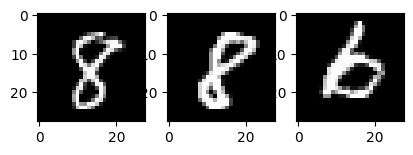

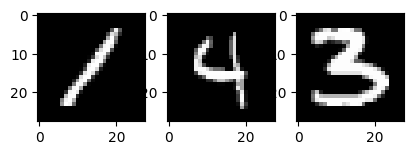

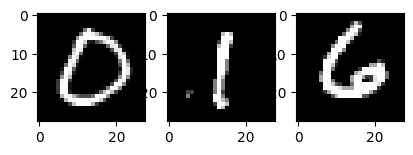

In [18]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

### Normalize and reshape inputs

In [19]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28*28)/255.
x_test = x_test.reshape(-1,28*28)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Define hyperparameters and model
Make a model illustrated by the following diagram:

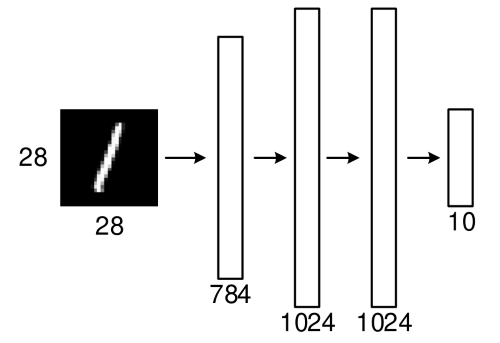

* Use tanh as an activation function for the hidden units.
* Use softmax as an activation function for the final units.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

epochs = 10
batch_size = 256

### Please fill here

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(784, activation='tanh'),
    tf.keras.layers.Dense(1024, activation='tanh'),
    tf.keras.layers.Dense(1024, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])


### Perform compile and training

In [21]:
model.compile(loss = 'mean_squared_error', optimizer='SGD', metrics=['acc'])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
235/235 [==============================] - 26s 105ms/step - loss: 0.0873 - acc: 0.2242 - val_loss: 0.0839 - val_acc: 0.3859
Epoch 2/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0804 - acc: 0.4742 - val_loss: 0.0762 - val_acc: 0.5619
Epoch 3/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0723 - acc: 0.5973 - val_loss: 0.0675 - val_acc: 0.6455
Epoch 4/10
235/235 [==============================] - 26s 109ms/step - loss: 0.0640 - acc: 0.6491 - val_loss: 0.0596 - val_acc: 0.6740
Epoch 5/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0570 - acc: 0.6784 - val_loss: 0.0532 - val_acc: 0.7080
Epoch 6/10
235/235 [==============================] - 25s 106ms/step - loss: 0.0515 - acc: 0.7137 - val_loss: 0.0482 - val_acc: 0.7425
Epoch 7/10
235/235 [==============================] - 26s 110ms/step - loss: 0.0470 - acc: 0.7429 - val_loss: 0.0442 - val_acc: 0.7640
Epoch 8/10
235/235 [==============================] - 2

### Plot learning curve

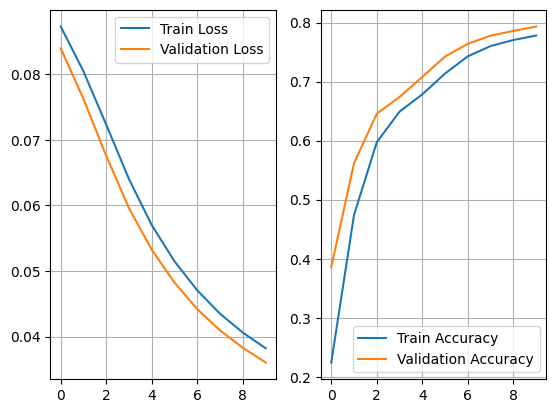

In [22]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

### Make a prediction on a sample in the test dataset

1/1 [==============================] - 0s 78ms/step
Actual : 2	Predict : 2


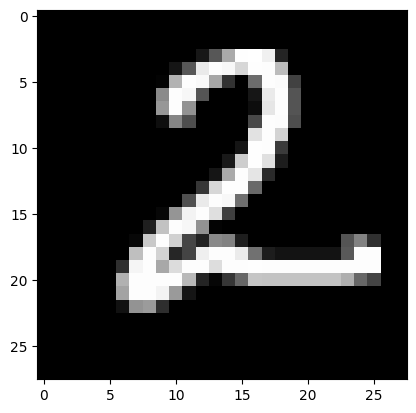

In [23]:
index =random.randint(0,9999)
plt.imshow(x_test[index].reshape(28,28),cmap="gray")
predict = model.predict(x_test[index].reshape(1,28*28))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)